# Visualizatoin of the CheXpert Dataset

Packages needed are imported.

In [1]:
import os
import pandas as pd
import PIL

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Global variables to help defining paths beforehand.

In [2]:
DATA = os.path.join(".", "data")
IMAGES_DATA = os.path.join(".", "images")
XRAY_SMALL_PATH = os.path.join(DATA, "CheXpert-v1.0-small")

In [3]:
def save_fig(fig_id, images_path, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(images_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
def load_labels(ray_path=XRAY_SMALL_PATH):
    train_path = os.path.join(ray_path, "train.csv")
    val_path = os.path.join(ray_path, "valid.csv")
    return pd.read_csv(train_path), pd.read_csv(val_path)

## Data loading and visualization.

Training and validation data is loaded.

In [5]:
csv_train, csv_val = load_labels()
csv_train.head()

Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN          NaN    NaN            NaN        NaN          NaN   
1           1.0          NaN   -1.0           -1.0        NaN         -1.0   
2           1.0          NaN    NaN           -1.0        NaN          NaN   
3           1.0          NaN    NaN           -1.0        NaN          NaN   
4           NaN          NaN    1.0            NaN        NaN          NaN   

   Pneumothorax  Pleural Effusion  Pleural Other  Fracture  Support Devices  
0           0.0               NaN            NaN       NaN              1.0  
1           NaN              -1.0            NaN       1.0              NaN  
2           NaN               NaN            NaN       1.0              NaN  
3           NaN               NaN            NaN       1.0              NaN  
4           0.0               NaN            NaN       NaN              NaN

In [6]:
csv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13  Atelectasis   

The first 4th columns do not contain any null value. They are data about the patient and the X-ray type. This columns will be used as features in the classification.

The remaining columns will be our objective to classify, they do contain null values, and there is quite a difference in the quantity.

In [7]:
csv_train["No Finding"].value_counts()

1.0    22381
Name: No Finding, dtype: int64

In [8]:
no_findings = csv_train[csv_train["No Finding"]==1.0]
no_findings.isin([1.0]).any()

Path                          False
Sex                           False
Age                           False
Frontal/Lateral               False
AP/PA                         False
No Finding                     True
Enlarged Cardiomediastinum    False
Cardiomegaly                  False
Lung Opacity                  False
Lung Lesion                   False
Edema                         False
Consolidation                 False
Pneumonia                     False
Atelectasis                   False
Pneumothorax                  False
Pleural Effusion              False
Pleural Other                 False
Fracture                      False
Support Devices                True
dtype: bool

The **no finding** column could help us correct the classification- if there is **No Finding** == 1.0 in a row and any anomally == 1.0 (Support Devices does not count as an anomally) something is wrong.

In [9]:
findings = csv_train[csv_train["No Finding"].isnull()]
findings.isin([1.0]).any()

Path                          False
Sex                           False
Age                           False
Frontal/Lateral               False
AP/PA                         False
No Finding                    False
Enlarged Cardiomediastinum     True
Cardiomegaly                   True
Lung Opacity                   True
Lung Lesion                    True
Edema                          True
Consolidation                  True
Pneumonia                      True
Atelectasis                    True
Pneumothorax                   True
Pleural Effusion               True
Pleural Other                  True
Fracture                       True
Support Devices                True
dtype: bool

Furthermore, if a row has not got a value in **No Finding**, it should predict an anomally.

In [10]:
paths= csv_train["Path"]

In [11]:
paths.value_counts()

CheXpert-v1.0-small/train/patient31919/study1/view1_frontal.jpg     1
CheXpert-v1.0-small/train/patient35418/study1/view1_frontal.jpg     1
CheXpert-v1.0-small/train/patient38395/study5/view1_frontal.jpg     1
CheXpert-v1.0-small/train/patient63313/study1/view1_frontal.jpg     1
CheXpert-v1.0-small/train/patient51157/study3/view1_frontal.jpg     1
                                                                   ..
CheXpert-v1.0-small/train/patient10746/study2/view1_frontal.jpg     1
CheXpert-v1.0-small/train/patient03323/study2/view2_frontal.jpg     1
CheXpert-v1.0-small/train/patient11346/study35/view1_frontal.jpg    1
CheXpert-v1.0-small/train/patient17876/study2/view1_frontal.jpg     1
CheXpert-v1.0-small/train/patient35667/study1/view2_frontal.jpg     1
Name: Path, Length: 223414, dtype: int64

Every file contains a new image, they do not repeat.

In [12]:
paths.values

array(['CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg',
       ...,
       'CheXpert-v1.0-small/train/patient64538/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient64539/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient64540/study1/view1_frontal.jpg'],
      dtype=object)

The paths will be used by the image data generator.

(320, 389)


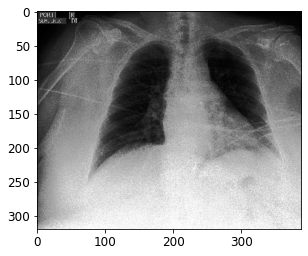

In [13]:
XRAY_PATH = paths[0]
XRAY_PATH2 = paths[42]
XRAY_IMAGE = os.path.join(DATA, XRAY_PATH)
XRAY_IMAGE2 = os.path.join(DATA, XRAY_PATH2)
img=mpimg.imread(XRAY_IMAGE)
print(img.shape)
imgplot = plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

(320, 320)


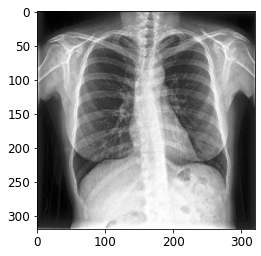

In [14]:
img=mpimg.imread(XRAY_IMAGE2)
print(img.shape)
imgplot = plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

Not all photos have the same size, we need to resize them.

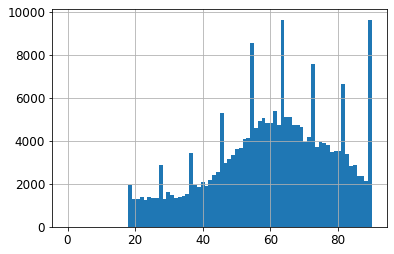

In [15]:
csv_train["Age"].hist(bins=80)
#save_fig("attribute_histogram_plots")
plt.show()

In [16]:
csv_train["Age"].describe()

count    223414.000000
mean         60.430653
std          17.820925
min           0.000000
25%          49.000000
50%          62.000000
75%          74.000000
max          90.000000
Name: Age, dtype: float64

The mean age is 60. We can see some ages stand up.

In [17]:
csv_train["Frontal/Lateral"].value_counts()

Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64

There are a lot more frontal images than lateral.

In [18]:
csv_train["AP/PA"].value_counts()

AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64

In [19]:
csv_train[csv_train["Frontal/Lateral"] == "Lateral"]["AP/PA"].value_counts()

Series([], Name: AP/PA, dtype: int64)

(390, 320)


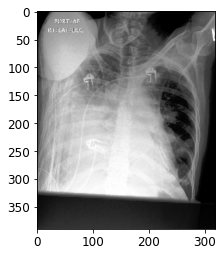

In [20]:
RL_XRAY_PATH  = csv_train[csv_train["AP/PA"] == "RL"]["Path"].values[0]
XRAY_IMAGE = os.path.join(DATA, RL_XRAY_PATH)
RL_XRAY_PATH  = csv_train[csv_train["AP/PA"] == "LL"]["Path"].values[4]
XRAY_IMAGE2 = os.path.join(DATA, RL_XRAY_PATH)
img=mpimg.imread(XRAY_IMAGE)
print(img.shape)
imgplot = plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

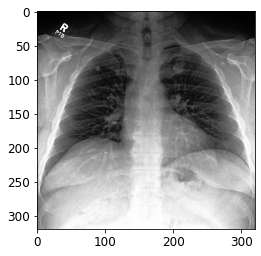

In [21]:
img=mpimg.imread(XRAY_IMAGE2)
imgplot = plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

The lateral images do not describe from which side are taken, and not every one marked as LL and RL are lateral.
Lastly, some images are not centered, and dates or/and data may appear in the upper left corner.